the average sale price is 100 thousand dollars if you can find less than average

- 

In [1]:
import numpy as np
import pandas as pd
# from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import cross_validate, ShuffleSplit

In [6]:
houses = pd.read_csv('../data/kc_house_data.csv')

# Exploratory Data Analysis

In [7]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [63]:
#allows us to see the full text of each object column, namely the "address" field

pd.set_option('display.max_colwidth', None) 
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188


In [8]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [10]:
houses.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [9]:
houses.loc[houses['heat_source'].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
1012,7807800250,4/11/2022,350000.0,2,1.0,1390,5000,1.0,NO,NO,...,PUBLIC,1390,0,380,0,1900,0,"200 East Railroad Avenue, Skykomish, Washingto...",47.709595,-121.359375
2067,1871400040,12/22/2021,276000.0,1,1.0,360,11400,1.0,NO,NO,...,PRIVATE,360,0,0,0,1955,0,"31312 Southeast 353rd Street, Enumclaw, Washin...",47.284010,-121.925410
2930,9413400100,10/5/2021,200000.0,2,0.0,730,10613,1.5,YES,NO,...,PRIVATE,730,0,0,120,1923,0,"52309 SE 496th Pl, Enumclaw, Washington 98022,...",47.155265,-121.648225
3153,3326079039,7/21/2021,760000.0,1,1.0,900,313632,1.5,NO,NO,...,PRIVATE,900,0,0,120,1970,0,"10203 316th Avenue Northeast, Carnation, Washi...",47.687570,-121.917460
3431,8046100101,7/22/2021,2500000.0,1,1.0,290,18870,1.0,NO,YES,...,PRIVATE,290,0,0,0,1900,0,"160 118th Avenue Southeast, Bellevue, Washingt...",47.608275,-122.182114
3676,7349700580,8/31/2021,50000.0,3,1.0,1850,17312,2.0,NO,NO,...,PRIVATE,1850,0,0,0,2000,0,"642 Avenue, Auburn, Nebraska 68305, United States",40.266940,-95.789180
5421,7225500375,7/21/2021,602000.0,2,1.0,1110,7988,1.0,NO,NO,...,PUBLIC,1110,0,0,0,1905,1930,"320 Williams Avenue North, Renton, Washington ...",47.487695,-122.205358
6603,8658300815,9/23/2021,565000.0,3,1.0,1240,6299,1.0,NO,NO,...,PUBLIC,1240,0,0,0,1936,0,"4503 Milwaukee Avenue, Carnation, Washington 9...",47.648165,-121.907855
6699,222029048,4/12/2022,219500.0,1,1.0,620,111720,1.0,YES,NO,...,PRIVATE,620,0,0,380,1958,0,"19909 Robinwood Road Southwest, Vashon, Washin...",47.426270,-122.511520
7576,1422039027,9/1/2021,680000.0,1,1.0,870,9806,1.0,YES,NO,...,PRIVATE,870,0,0,0,1923,0,"4252 Southwest Luana Beach Road, Vashon, Washi...",47.393705,-122.384125


In [12]:
# dropping all nulls from both heat_source and sewer_system since it is very small .1%
houses.dropna(inplace=True)

In [13]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [25]:
houses.shape

(30111, 25)

In [77]:
cat_dum = pd.get_dummies(data=houses, 
                         columns=['waterfront', 'greenbelt', 'nuisance', 'view', 
                                  'condition', 'grade', 'heat_source', 'sewer_system']
                        )
cat_dum

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,1180,0,...,0,1,0,0,0,0,0,0,1,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,1570,1570,...,0,0,0,1,0,0,0,0,1,0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,1580,1580,...,0,1,0,0,0,0,0,0,1,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,1090,1070,...,0,1,0,0,0,0,0,0,1,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,1120,550,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,1600,1130,...,0,0,0,1,0,0,0,0,1,0
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,2020,0,...,0,1,0,0,0,0,0,0,1,0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,940,920,...,0,1,0,0,0,0,0,0,1,0
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,1830,740,...,0,1,0,0,0,0,0,0,1,0


In [78]:
cat_dum.drop(columns='price', inplace=True)

In [79]:
cat_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               30111 non-null  int64  
 1   date                             30111 non-null  object 
 2   bedrooms                         30111 non-null  int64  
 3   bathrooms                        30111 non-null  float64
 4   sqft_living                      30111 non-null  int64  
 5   sqft_lot                         30111 non-null  int64  
 6   floors                           30111 non-null  float64
 7   sqft_above                       30111 non-null  int64  
 8   sqft_basement                    30111 non-null  int64  
 9   sqft_garage                      30111 non-null  int64  
 10  sqft_patio                       30111 non-null  int64  
 11  yr_built                         30111 non-null  int64  
 12  yr_renovated      

### Dropping the columns with the most frequency for each catagorical binary columns 

In [27]:
houses['waterfront'].value_counts()

NO     29600
YES      511
Name: waterfront, dtype: int64

In [28]:
houses['greenbelt'].value_counts()

NO     29339
YES      772
Name: greenbelt, dtype: int64

In [29]:
houses['nuisance'].value_counts()

NO     24862
YES     5249
Name: nuisance, dtype: int64

In [30]:
houses['view'].value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [46]:
houses['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [74]:
houses['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [75]:
houses['heat_source'].value_counts()

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [76]:
houses['sewer_system'].value_counts()

PUBLIC                25767
PRIVATE                4336
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [82]:
cat_dum.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'waterfront_NO',
       'waterfront_YES', 'greenbelt_NO', 'greenbelt_YES', 'nuisance_NO',
       'nuisance_YES', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE',
       'sewer_system

In [83]:
cat_dum.drop(columns=['waterfront_NO', 'greenbelt_NO', 'nuisance_NO', 
                      'view_NONE', 'condition_Average', 'grade_7 Average', 
                      'heat_source_Gas', 'sewer_system_PUBLIC'], 
             inplace=True)

In [84]:
cat_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               30111 non-null  int64  
 1   date                             30111 non-null  object 
 2   bedrooms                         30111 non-null  int64  
 3   bathrooms                        30111 non-null  float64
 4   sqft_living                      30111 non-null  int64  
 5   sqft_lot                         30111 non-null  int64  
 6   floors                           30111 non-null  float64
 7   sqft_above                       30111 non-null  int64  
 8   sqft_basement                    30111 non-null  int64  
 9   sqft_garage                      30111 non-null  int64  
 10  sqft_patio                       30111 non-null  int64  
 11  yr_built                         30111 non-null  int64  
 12  yr_renovated      

## Feature engineering for date

In [89]:
cat_dum.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,grade_9 Better,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC RESTRICTED
0,7399300360,5/24/2022,4,1.0,1180,7140,1.0,1180,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8910500230,12/13/2021,5,2.5,2770,6703,1.0,1570,1570,0,...,0,0,0,0,1,0,0,0,0,0
2,1180000275,9/29/2021,6,2.0,2880,6156,1.0,1580,1580,0,...,0,0,0,0,0,0,0,0,0,0
3,1604601802,12/14/2021,3,3.0,2160,1400,2.0,1090,1070,200,...,1,0,0,0,0,0,0,0,0,0
4,8562780790,8/24/2021,2,2.0,1120,758,2.0,1120,550,550,...,0,1,0,0,0,0,0,0,0,0


In [90]:
# making date into datetime format
cat_dum['date'] = pd.to_datetime(cat_dum['date'], infer_datetime_format=True)

cat_dum.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,grade_9 Better,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC RESTRICTED
0,7399300360,2022-05-24,4,1.0,1180,7140,1.0,1180,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8910500230,2021-12-13,5,2.5,2770,6703,1.0,1570,1570,0,...,0,0,0,0,1,0,0,0,0,0
2,1180000275,2021-09-29,6,2.0,2880,6156,1.0,1580,1580,0,...,0,0,0,0,0,0,0,0,0,0
3,1604601802,2021-12-14,3,3.0,2160,1400,2.0,1090,1070,200,...,1,0,0,0,0,0,0,0,0,0
4,8562780790,2021-08-24,2,2.0,1120,758,2.0,1120,550,550,...,0,1,0,0,0,0,0,0,0,0


In [91]:
# feature engineering 
# making a 'yr_sold' column using the year from 'date'
cat_dum['yr_sold'] = pd.to_datetime(cat_dum['date'], infer_datetime_format=True).dt.year
cat_dum.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC RESTRICTED,yr_sold
0,7399300360,2022-05-24,4,1.0,1180,7140,1.0,1180,0,0,...,0,0,0,0,0,0,0,0,0,2022
1,8910500230,2021-12-13,5,2.5,2770,6703,1.0,1570,1570,0,...,0,0,0,1,0,0,0,0,0,2021
2,1180000275,2021-09-29,6,2.0,2880,6156,1.0,1580,1580,0,...,0,0,0,0,0,0,0,0,0,2021
3,1604601802,2021-12-14,3,3.0,2160,1400,2.0,1090,1070,200,...,0,0,0,0,0,0,0,0,0,2021
4,8562780790,2021-08-24,2,2.0,1120,758,2.0,1120,550,550,...,1,0,0,0,0,0,0,0,0,2021


In [104]:
cat_dum.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'waterfront_YES',
       'greenbelt_YES', 'nuisance_YES', 'view_AVERAGE', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Electricity', 'heat_source_Electricity/Solar',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC RESTRICTED',
       'yr_sold', 'zipcode'],
      dtype='object')

In [92]:
cat_dum['yr_sold'].value_counts()

2021    19261
2022    10850
Name: yr_sold, dtype: int64

In [105]:
cat_dum['yr_built'].value_counts()

2021    1700
1968     514
2020     504
1978     493
1977     484
        ... 
1901      39
1934      38
1935      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

In [108]:
cat_dum['yr_built'].dtypes

dtype('int64')

In [106]:
cat_dum['yr_renovated'].value_counts()

0       28743
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1972        1
1948        1
1942        1
1966        1
Name: yr_renovated, Length: 82, dtype: int64

# Feature engineering for zipcode

In [109]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188


In [102]:
cat_dum['zipcode'] = [x.split(',')[2][-5:] for x in cat_dum['address']] 
cat_dum.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,heat_source_Electricity/Solar,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC RESTRICTED,yr_sold,zipcode
0,7399300360,2022-05-24,4,1.0,1180,7140,1.0,1180,0,0,...,0,0,0,0,0,0,0,0,2022,98055
1,8910500230,2021-12-13,5,2.5,2770,6703,1.0,1570,1570,0,...,0,0,1,0,0,0,0,0,2021,98133
2,1180000275,2021-09-29,6,2.0,2880,6156,1.0,1580,1580,0,...,0,0,0,0,0,0,0,0,2021,98178
3,1604601802,2021-12-14,3,3.0,2160,1400,2.0,1090,1070,200,...,0,0,0,0,0,0,0,0,2021,98118
4,8562780790,2021-08-24,2,2.0,1120,758,2.0,1120,550,550,...,0,0,0,0,0,0,0,0,2021,98027


In [103]:
cat_dum['zipcode'].value_counts()

98042    992
98038    857
98103    760
98115    760
98117    748
        ... 
72751      1
08260      1
80210      1
52241      1
15064      1
Name: zipcode, Length: 400, dtype: int64

In [111]:
houses.duplicated(subset=['address']).sum()

592

# Duplicates

## found true duplicate using house id
decided to drop one of the entries

In [119]:
# .duplicated returns the second instance that happens - that is why there is only one entry as the output
houses.loc[houses.duplicated(subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,duplicate_address
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washington 98033, United States",47.68069,-122.172135,True


In [122]:
houses.loc[houses['id'] == 1233100736]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,duplicate_address
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washington 98033, United States",47.68069,-122.172135,False
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washington 98033, United States",47.68069,-122.172135,True


In [123]:
houses.loc[houses['id'] == 1931301123]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,duplicate_address
553,1931301123,11/5/2021,880000.0,2,2.0,1240,669,2.0,NO,NO,...,860,380,0,310,2021,0,"Linden Avenue, Scituate, Massachusetts 02066, United States",42.19695,-70.73227,True


In [114]:
houses['duplicate_address'] = houses.duplicated(subset=['address'])
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,duplicate_address
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052,False
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591,False
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520,False
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020,False
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188,False


In [118]:
houses.loc[houses['duplicate_address'] == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,duplicate_address
553,1931301123,11/5/2021,880000.0,2,2.0,1240,669,2.0,NO,NO,...,860,380,0,310,2021,0,"Linden Avenue, Scituate, Massachusetts 02066, United States",42.196950,-70.732270,True
853,1972201341,2/9/2022,1018000.0,3,2.5,1510,1117,2.0,NO,NO,...,1060,450,0,450,2016,0,"Linden Avenue, Scituate, Massachusetts 02066, United States",42.196950,-70.732270,True
938,6183750190,7/19/2021,659990.0,3,2.5,1210,1024,2.0,NO,NO,...,990,450,230,0,2020,0,"15th Avenue, Plattsmouth, Nebraska 68048, United States",40.978835,-95.884890,True
1227,5694000786,11/3/2021,875000.0,3,2.5,1150,1249,2.0,NO,NO,...,860,290,0,420,2021,0,"Linden Avenue, Scituate, Massachusetts 02066, United States",42.196950,-70.732270,True
1415,6183750200,7/22/2021,649990.0,3,2.5,1210,1024,2.0,NO,NO,...,990,450,230,0,2020,0,"15th Avenue, Plattsmouth, Nebraska 68048, United States",40.978835,-95.884890,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30044,9834201391,2/17/2022,520000.0,2,2.0,790,597,2.0,NO,NO,...,520,270,0,210,2021,0,"36th Avenue, Kenosha, Wisconsin 53142, United States",42.548430,-87.851900,True
30078,7938810100,6/10/2021,1624950.0,5,4.5,4170,8263,2.0,NO,NO,...,4170,0,650,250,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
30114,9525600040,2/14/2022,1450000.0,2,2.5,1940,4190,2.0,NO,NO,...,1350,810,220,380,1981,0,"101 Northwest 58th Street, Seattle, Washington 98107, United States",47.670380,-122.358203,True
30116,2768100152,1/1/2022,710000.0,1,2.0,1180,616,3.0,NO,NO,...,840,340,0,330,2021,0,"57th Street Lane NW, Rochester, Minnesota 55901, United States",44.081760,-92.524610,True


In [124]:
houses.loc[houses['address'] == 'Northeast 201st Street, Woodinville, Washington 98072, United States']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,duplicate_address
4695,7938810020,7/8/2021,1444950.0,4,3.0,2820,7209,2.0,NO,NO,...,2820,0,480,250,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,False
7541,7938810080,7/8/2021,1431950.0,4,3.0,2820,10617,2.0,NO,NO,...,2820,0,480,250,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
12100,7938810050,11/8/2021,2100000.0,5,4.5,4170,8284,2.0,NO,NO,...,4170,0,650,250,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
15140,7938810030,8/5/2021,1680000.0,4,3.5,3170,7214,2.0,NO,NO,...,3170,0,600,0,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
16068,7938810160,8/5/2021,1418950.0,4,3.0,2820,8123,2.0,NO,NO,...,2820,0,480,250,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
18057,7938810140,7/8/2021,1810000.0,5,4.5,4170,8299,2.0,NO,NO,...,4170,0,650,250,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
23798,7938810090,7/8/2021,1602000.0,5,3.0,3090,7186,2.0,NO,NO,...,3090,0,450,220,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
27567,7938810040,7/8/2021,1599950.0,4,3.5,3170,7205,2.0,NO,NO,...,3170,0,600,0,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
28091,7938810120,7/16/2021,1585000.0,4,3.5,3170,7443,2.0,NO,NO,...,3170,0,600,0,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True
29813,7938810110,7/6/2021,1687950.0,5,4.5,4170,8314,2.0,NO,NO,...,4170,0,650,250,2021,0,"Northeast 201st Street, Woodinville, Washington 98072, United States",47.773785,-122.168215,True


In [129]:
print (str(cat_dum['date'].dt.date.min()) + ' to ' +str(cat_dum['date'].dt.date.max()))

2021-06-10 to 2022-06-09


# Running regressions to find which variables we should include in our MLR

Here, we begin to analyze the predictors/variables and test out our first linear regression. 

We start with sqft_living space, as our general assumption is that the bigger the living space, the higher the price of a given house.

In [62]:
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [126]:
houses.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,duplicate_address
id,1.000000,-0.034096,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,0.023076,-0.028858,-0.000764,0.000638,0.007304
price,-0.034096,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,0.095796,0.085023,0.063430,-0.022278,-0.028872
bedrooms,-0.007065,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791,-0.112509
bathrooms,-0.012382,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684,-0.000738
sqft_living,-0.028234,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625,-0.104449
sqft_lot,-0.119276,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408,-0.036071
floors,0.031941,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589,0.221294
sqft_above,-0.023340,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722,-0.101497
sqft_basement,-0.015077,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104,-0.041812
sqft_garage,-0.008044,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639,-0.107660


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


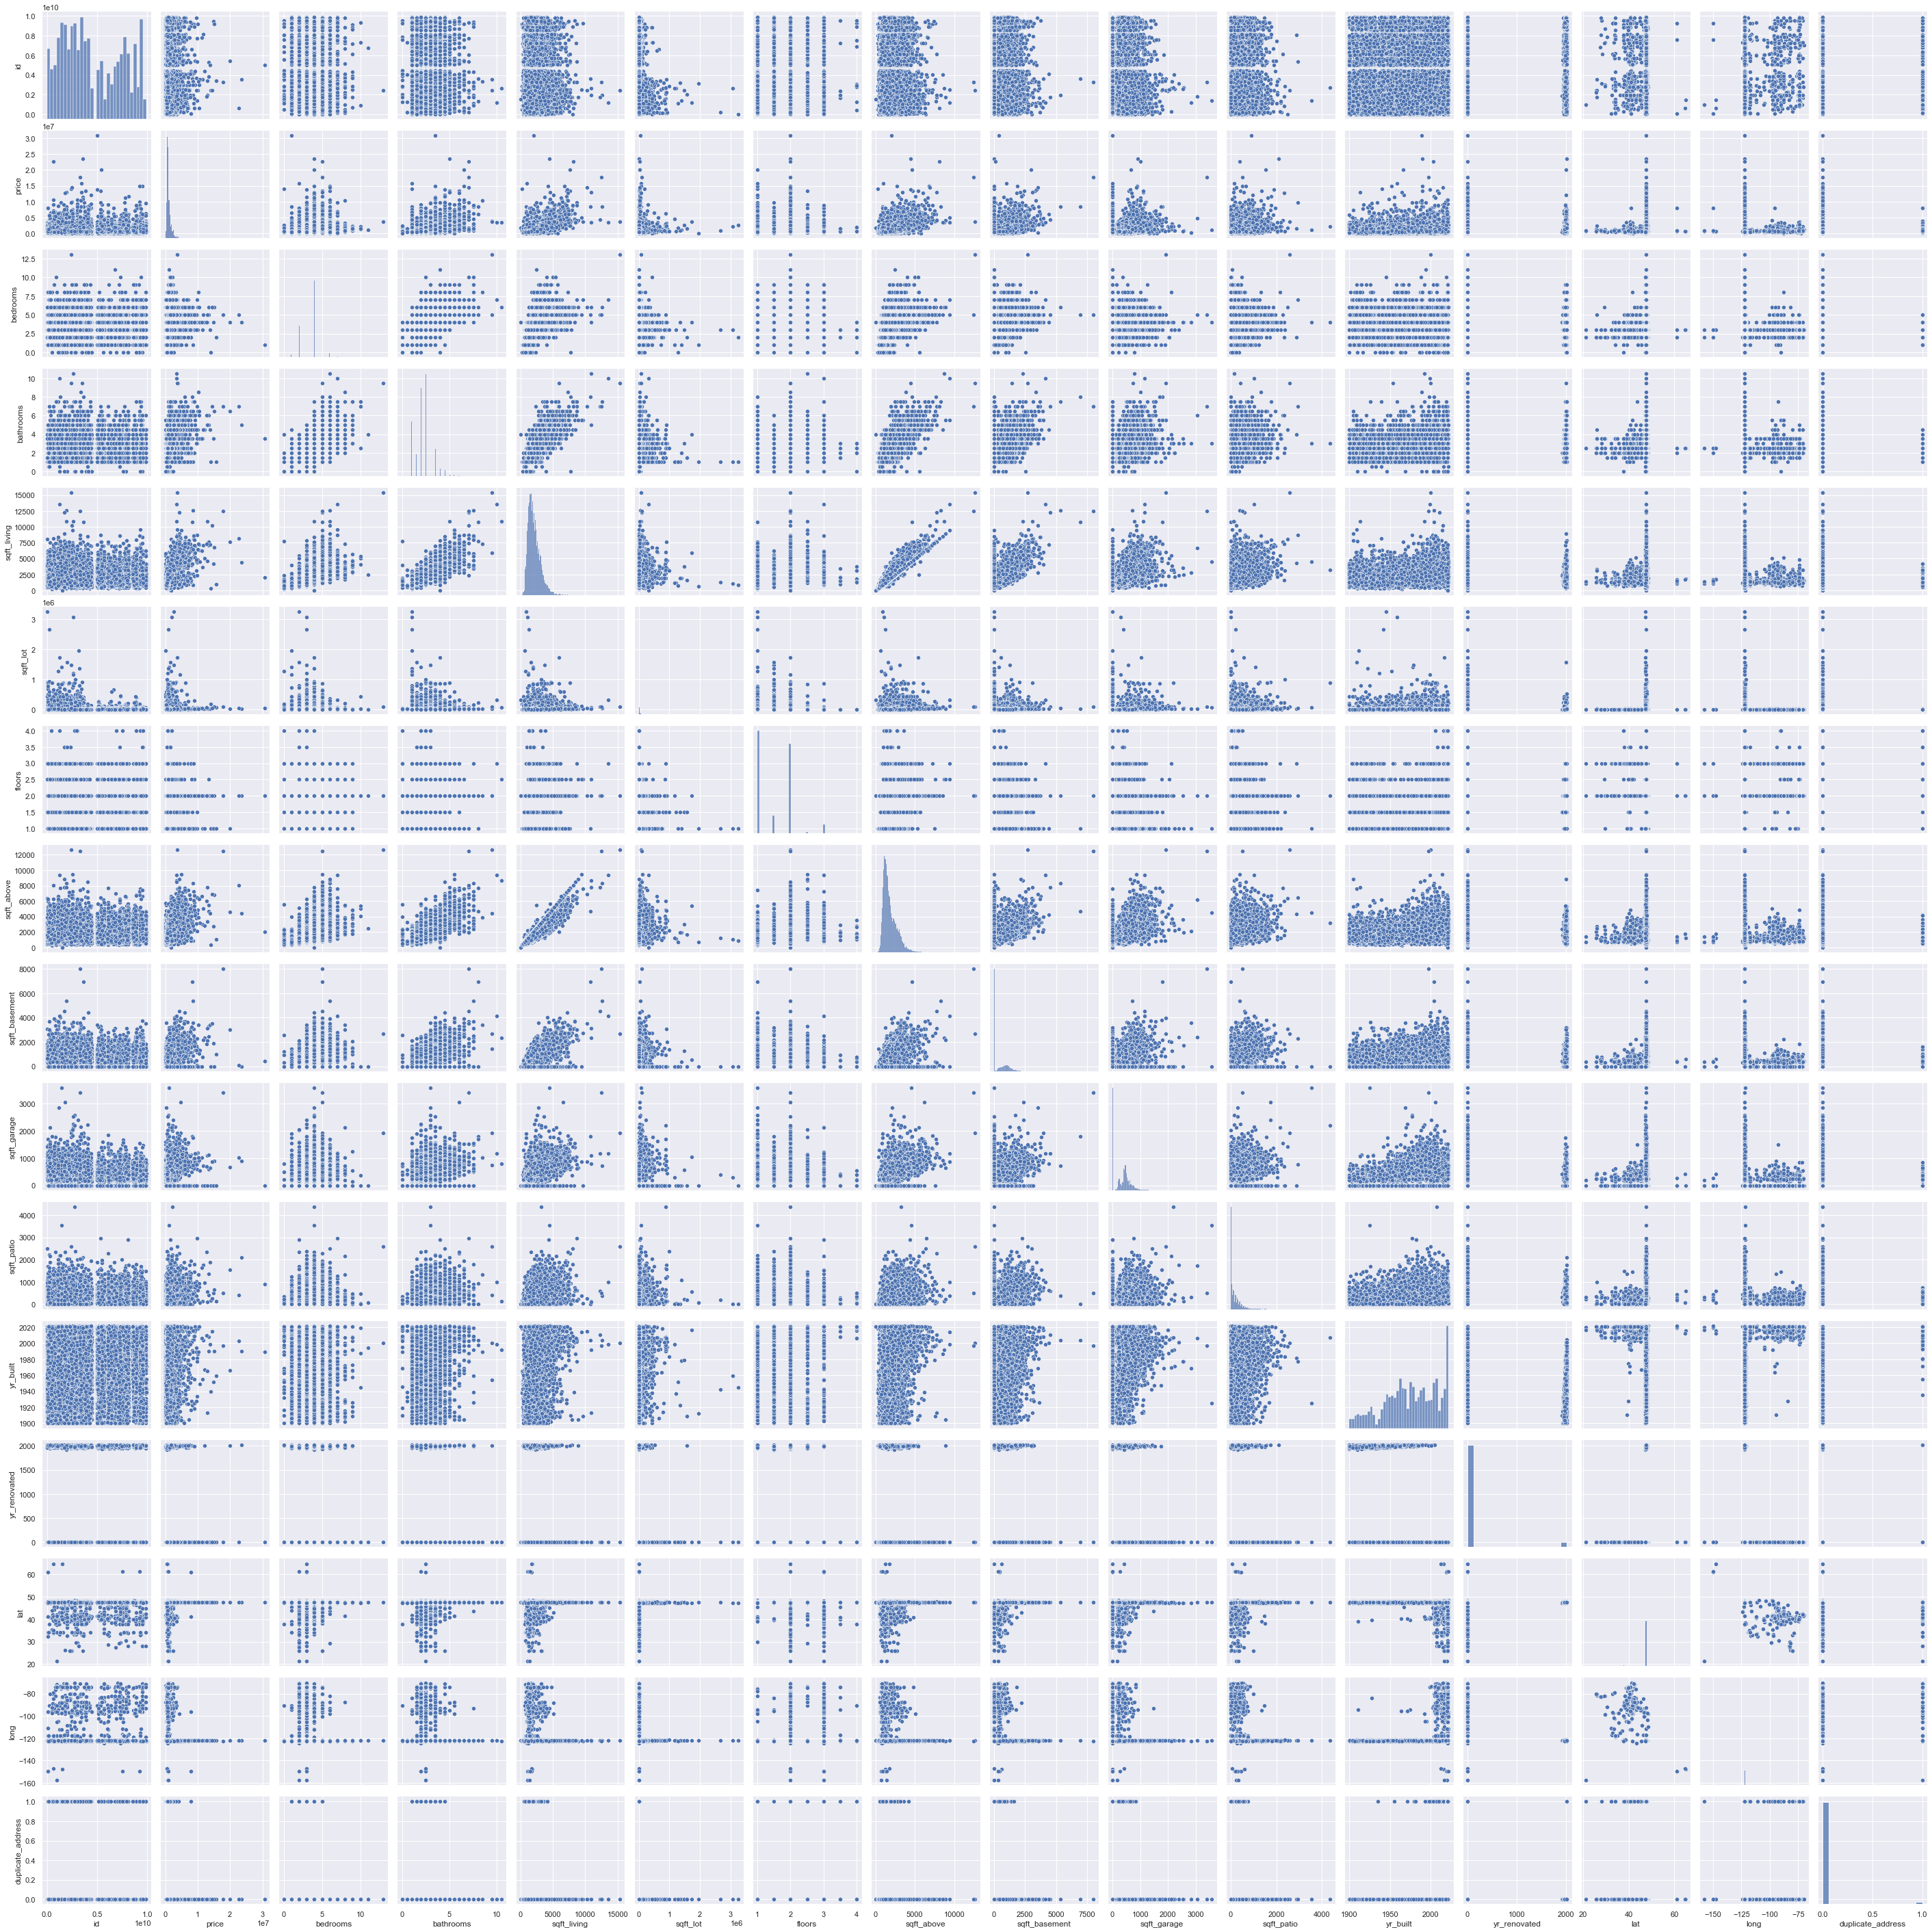

In [127]:
# Making a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(data=houses)

In [94]:
cat_dum.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC RESTRICTED,yr_sold
id,1.000000,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,...,-0.060304,0.007627,0.000649,-0.018569,-0.002977,-0.013582,-0.146185,-0.006032,-0.008674,-0.009094
bedrooms,-0.007065,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,...,-0.193983,0.001152,0.014286,-0.091664,-0.007826,-0.018820,-0.033531,-0.013354,0.002562,-0.027387
bathrooms,-0.012382,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,...,-0.130074,0.001854,0.032530,-0.252576,-0.007600,-0.014822,-0.033931,-0.004870,0.001846,-0.042125
sqft_living,-0.028234,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,...,-0.210116,-0.006556,0.031869,-0.143052,-0.002970,-0.005215,0.061973,-0.009285,0.000513,-0.029198
sqft_lot,-0.119276,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,...,0.069716,-0.002644,0.001292,0.010227,-0.001386,0.059848,0.360954,0.002890,-0.002057,-0.004733
floors,0.031941,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,...,0.019300,0.026365,0.001533,-0.221423,-0.005958,-0.001975,-0.133720,-0.000987,0.013886,-0.017305
sqft_above,-0.023340,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,...,-0.210269,-0.008119,0.016159,-0.168613,-0.006177,-0.003596,0.082217,-0.010372,0.002592,-0.023131
sqft_basement,-0.015077,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,...,-0.072655,-0.002454,0.031675,0.120436,0.005733,-0.003918,-0.044669,-0.001659,-0.002266,-0.009571
sqft_garage,-0.008044,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,...,-0.198452,-0.010929,0.003343,-0.198317,-0.010710,-0.009021,0.122689,-0.007238,-0.000017,-0.012821
sqft_patio,-0.041644,0.183660,0.327982,0.396530,0.154575,0.125016,0.312593,0.210305,0.216512,1.000000,...,0.031985,0.010221,0.014081,-0.100851,-0.005284,0.009748,0.181859,0.005283,0.005936,-0.016531


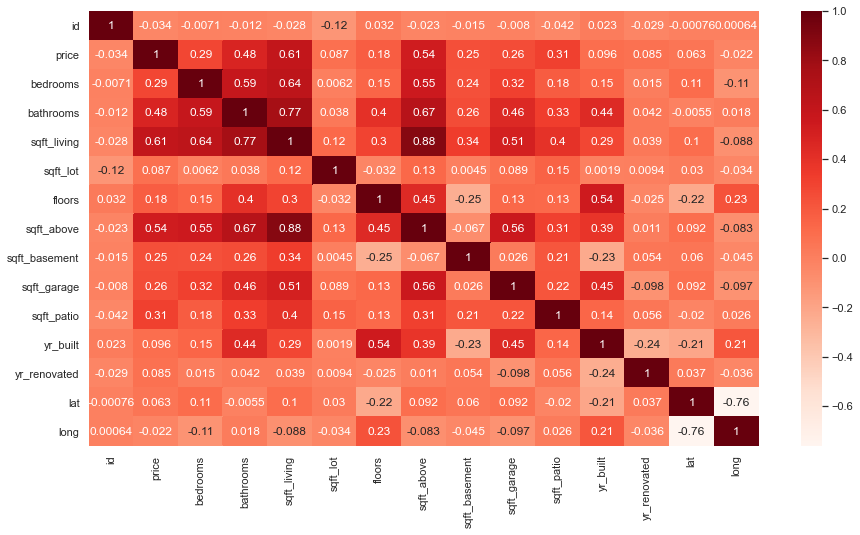

In [96]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(houses.corr(), cmap='Reds', annot=True);

In [97]:
cat_dum.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC RESTRICTED,yr_sold
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,...,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,...,0.214540,0.001959,0.003089,0.096277,0.000133,0.000664,0.144001,0.000166,0.000100,2021.360333
std,2.882236e+09,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,...,0.410509,0.044223,0.055490,0.294976,0.011525,0.025764,0.351096,0.012885,0.009981,0.480105
min,1.000055e+06,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000
25%,2.070850e+09,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000
50%,3.876000e+09,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000
75%,7.287100e+09,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000
max,9.904000e+09,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000


In [128]:
y = houses['price']
x = cat_dum[['sqft_living']]


df_lineartest = sm.OLS(y, sm.add_constant(x)).fit().summary()

df_lineartest

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:10:32   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4 assumptions of linear regression:

#### (i) linearity and additivity of the relationship between dependent and independent variables:

- (a) The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.

- (b) The slope of that line does not depend on the values of the other variables.

- (c)  The effects of different independent variables on the expected value of the dependent variable are additive.

#### (ii) statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data)

#### (iii) homoscedasticity (constant variance) of the errors

- (a) versus time (in the case of time series data)

- (b) versus the predictions

- (c) versus any independent variable

#### (iv) normality of the error distribution.